### This is a Markdown cell

In [5]:
!pip install spotpy

In [1]:
# A main module to run various analysis with CFE model
import os
import sys
import numpy as np
import pandas as pd
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
import json

# sys.path.append("G://Shared drives/Ryoko and Hilary/SMSigxModel/analysis/3_model/libs/cfe/py_cfe")
sys.path.append("G:/Shared drives/Ryoko and Hilary/Github_ex/cfe/py_cfe")
import cfe
import bmi_cfe

# specify current directory create output directory if it does not exist
os.chdir("G://Shared drives/Ryoko and Hilary/SMSigxModel/analysis/3_model")
os.getcwd()
out_path = '..\\4_out\\Mahurangi'
if not os.path.exists(out_path):
    os.mkdir(out_path)
data_file_path = '..\\2_data_input\\Mahurangi'

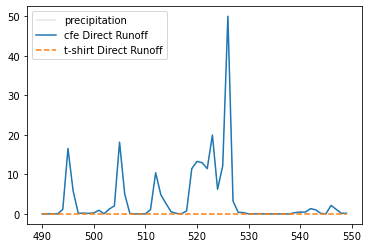

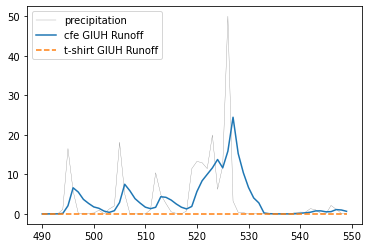

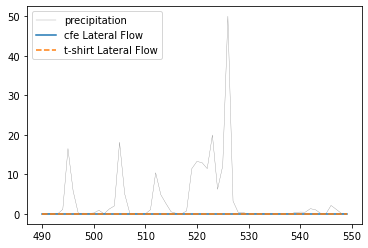

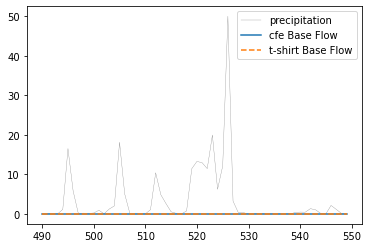

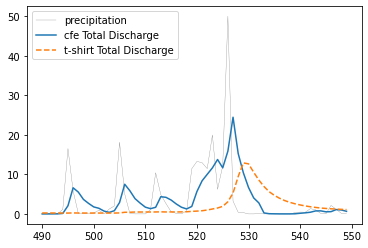

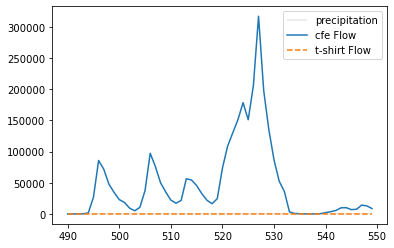


GLOBAL MASS BALANCE
  initial volume:   0.3001
    volume input: 21538.4066
   volume output: 21538.2555
    final volume:   0.4450
        residual: 1.5738e-10

SCHAAKE MASS BALANCE
  surface runoff: 21538.2617
    infiltration:   0.1449
schaake residual: 2.2806e-12

GIUH MASS BALANCE
  vol. into giuh: 21538.2617
   vol. out giuh: 21538.2555
 vol. end giuh q:   0.0062
   giuh residual: 1.5403e-10

SOIL WATER CONCEPTUAL RESERVOIR MASS BALANCE
   init soil vol:   0.2901
  vol. into soil:   0.1449
vol.soil2latflow:   0.0000
 vol. soil to gw:   0.0000
 final vol. soil:   0.4350
vol. soil resid.: 5.5511e-17

NASH CASCADE CONCEPTUAL RESERVOIR MASS BALANCE
    vol. to nash:   0.0000
  vol. from nash:   0.0000
 final vol. nash:   0.0000
nash casc resid.: 0.0000e+00

GROUNDWATER CONCEPTUAL RESERVOIR MASS BALANCE
init gw. storage:   0.0100
       vol to gw:   0.0000
     vol from gw:   0.0000
final gw.storage:   0.0100
    gw. residual: 0.0000e+00


In [13]:
input_config = {
    "forcing_file": "..\\2_data_input\\Mahurangi\\full\\mahurangi_1998_2001.csv",
    "catchment_area_km2": 46.65, 
    "soil_params": { # bounds, init
        "bb": 10, # 2-15, 8.17
        "mult": 1000.0,
        "satdk": 1E-04, # 1E-07-1E-05, but can be larger? 
        "satpsi": 0.33, # 0.02-0.78, 0.263 
        "slop": 0.2, # 0-1, 0.02
        "smcmax": 0.5,  # 0.33-0.7, 0.57
        "wltsmc": 0.3,  # 0-0.7, 0.35 or 0.17
        "D": 0.87,                     # fixed 
        "exponent_primary": 1.0,       # fixed
        "coeff_secondary": 0.01,   # ?, 0.01
        "exponent_secondary": 0.015, # ?, 1
        "depth": 0.5
    },
    "max_gw_storage": 50,        # 10-250, 16 or 50
    "gw_storage":10, 
    "soil_storage":0.5,
    "gw_coeff_primary": 0.01,                   # ?, 0.01 or 1
    "gw_exponent_primary": 1,                  # 1-8, 3 or 6
    "gw_coeff_secondary": 0.01, 
    "gw_exponent_secondary": 1,
    "Cgw": 0.01,
    "expon": 1,
    "K_lf": 46.875000531249995,                  # fixed
    "K_nash": 0.03,               # fixed
    "nash_storage": [0.0, 0.0],                  # fixed
    "giuh_ordinates": [0.1, 0.35, 0.2, 0.14, 0.1, 0.06, 0.05], # fixed
    "refkdt": 0.1,                 # 0.1-4, 3
    "trigger_z_m": 0.5,           # 0.01-0.87
    "alpha_fc": 0.33,               # 0.01-0.33
    "stand_alone": 1,
    "unit_test": 1,
    "compare_results_file": "G:\\Shared drives\\Ryoko and Hilary\\SMSigxModel\\analysis\\2_data_input\\Mahurangi\\full\\test_sm_basinavg.csv",
}

input_path = os.path.join(data_file_path, 'full', 'config_cfe_uptodate.json')

with open(input_path, 'w') as outfile:
    json.dump(input_config, outfile)

with open(input_path) as outfile:
    loaded_data = json.load(outfile)

cfe_instance = bmi_cfe.BMI_CFE(input_path)
cfe_instance.initialize()
cfe_instance.run_unit_test(plot=True, print_fluxes=False)
cfe_instance.finalize(print_mass_balance=True)